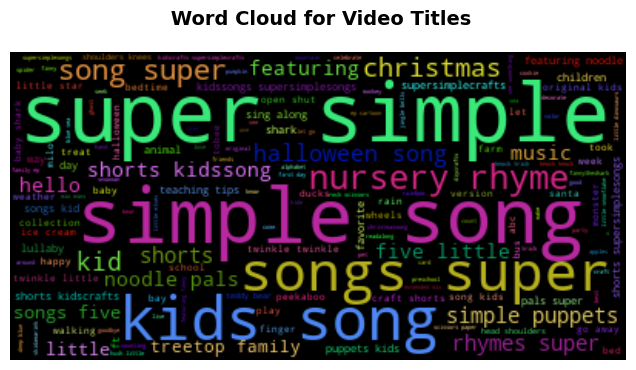

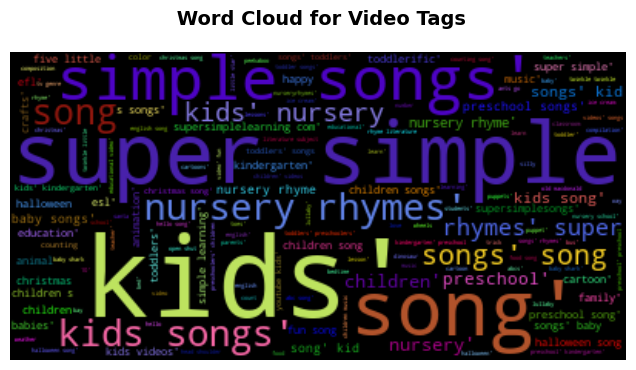

In [23]:
# import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# Load the dataset
df = pd.read_csv('youtube_dataset.csv')

# Function to generate a random color
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = random.randint(0, 360)  # Random hue value
    s = random.randint(60, 100)  # Random saturation value
    l = random.randint(30, 70)  # Random lightness value
    return f'hsl({h}, {s}%, {l}%)'

# Preprocess text data for "title" and "tags"
titles = ' '.join(df['title'].str.lower())
tags = ' '.join(df['tags'].str.lower())

# Create a function to generate and display a word cloud with a heading
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=400, height=200, background_color='black', colormap='viridis',
                          color_func=random_color_func).generate(text)
    
    # Create a professional-looking plot
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f' Word Cloud for {title}', color='black', fontsize=14, fontweight='bold', pad=20)
    plt.show()

# Generate and display smaller word clouds for "title" and "tags" with headings
generate_word_cloud(titles, 'Video Titles')
generate_word_cloud(tags, 'Video Tags')


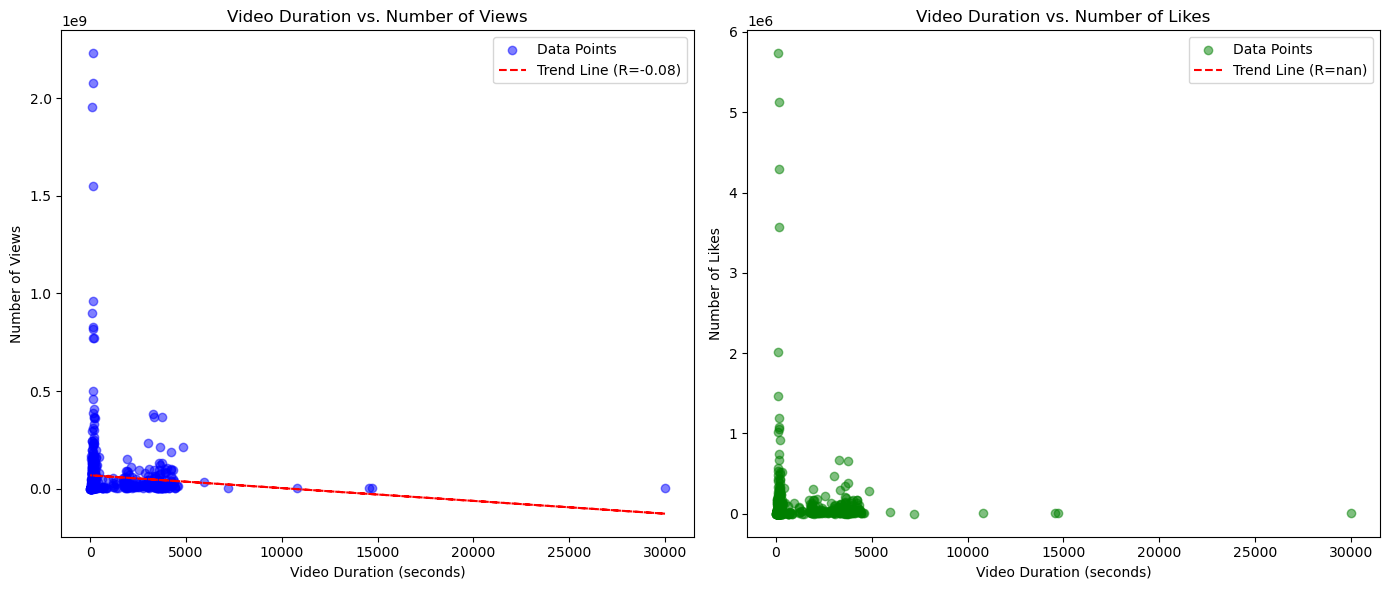

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Load the dataset
df = pd.read_csv('youtube_dataset.csv')

# Extract the relevant columns
video_duration_seconds = df['duration_in_seconds']
number_of_views = df['viewCount']
number_of_likes = df['likeCount']

# Create subplots with more elaborate scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for Video Duration vs. Number of Views
axes[0].scatter(video_duration_seconds, number_of_views, alpha=0.5, color='b', label='Data Points')
axes[0].set_xlabel('Video Duration (seconds)')
axes[0].set_ylabel('Number of Views')
axes[0].set_title('Video Duration vs. Number of Views')

# Calculate and plot a trend line (regression line)
slope_views, intercept_views, r_value_views, _, _ = linregress(video_duration_seconds, number_of_views)
trendline_views = slope_views * video_duration_seconds + intercept_views
axes[0].plot(video_duration_seconds, trendline_views, color='r', linestyle='--', label=f'Trend Line (R={r_value_views:.2f})')
axes[0].legend()

# Scatter plot for Video Duration vs. Number of Likes
axes[1].scatter(video_duration_seconds, number_of_likes, alpha=0.5, color='g', label='Data Points')
axes[1].set_xlabel('Video Duration (seconds)')
axes[1].set_ylabel('Number of Likes')
axes[1].set_title('Video Duration vs. Number of Likes')

# Calculate and plot a trend line (regression line)
slope_likes, intercept_likes, r_value_likes, _, _ = linregress(video_duration_seconds, number_of_likes)
trendline_likes = slope_likes * video_duration_seconds + intercept_likes
axes[1].plot(video_duration_seconds, trendline_likes, color='r', linestyle='--', label=f'Trend Line (R={r_value_likes:.2f})')
axes[1].legend()

# Adjust layout for subplots
plt.tight_layout()

# Show the plots
plt.show()


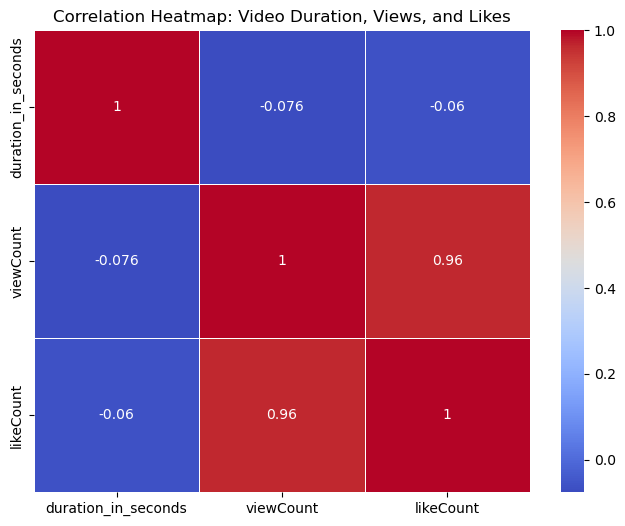

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('youtube_dataset.csv')

# Extract the relevant columns
data = df[['duration_in_seconds', 'viewCount', 'likeCount']]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Heatmap: Video Duration, Views, and Likes')

# Show the heatmap
plt.show()


#Strong positive correlations are represented by intense colors

#Strong negative correlations are represented by intense colors of a different hue

#Little to no correlation is represented by colors closer to a neutral shade


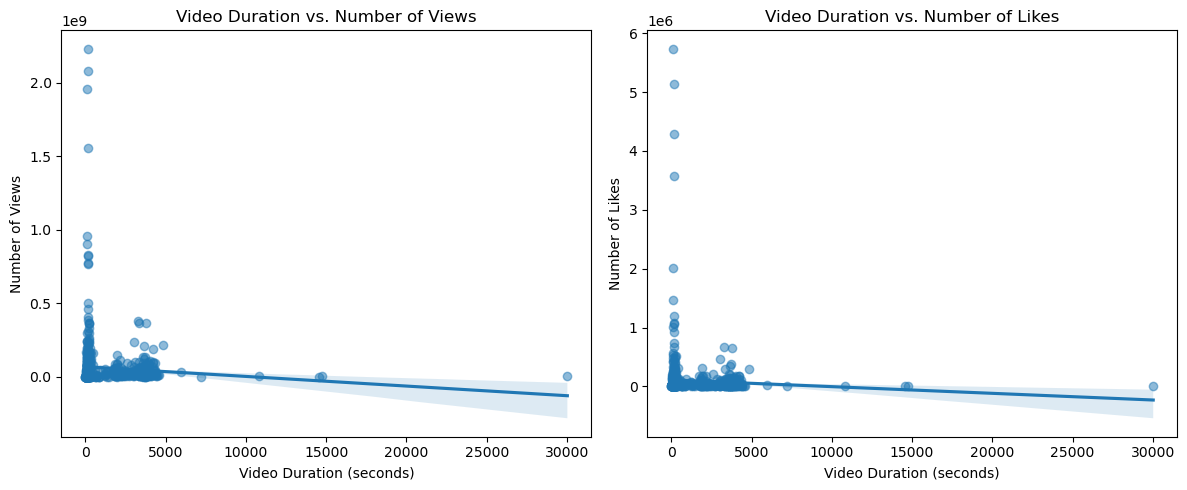

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('youtube_dataset.csv')

# Create a pair of scatter plots with regression lines
plt.figure(figsize=(12, 5))

# Scatter plot for Video Duration vs. Number of Views
plt.subplot(1, 2, 1)
sns.regplot(data=df, x='duration_in_seconds', y='viewCount', scatter_kws={'alpha':0.5})
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Number of Views')
plt.title('Video Duration vs. Number of Views')

# Scatter plot for Video Duration vs. Number of Likes
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='duration_in_seconds', y='likeCount', scatter_kws={'alpha':0.5})
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Number of Likes')
plt.title('Video Duration vs. Number of Likes')

# Adjust layout for subplots
plt.tight_layout()

# Show the plots
plt.show()


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv('youtube_dataset.csv')

# Extract relevant columns
video_tags = df['tags']
number_of_views = df['viewCount']

# Tokenize and preprocess video tags
vectorizer = CountVectorizer(token_pattern=r'[a-zA-Z0-9_-]+')
tag_matrix = vectorizer.fit_transform(video_tags)

# Calculate word frequency in tags
word_frequencies = tag_matrix.sum(axis=0)

# Convert word frequencies to a DataFrame
word_frequency_df = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Frequency': word_frequencies.tolist()[0]
})

# Calculate Pearson correlation between word frequency and number of views
correlations = []
for word in word_frequency_df['Word']:
    correlation, _ = pearsonr(tag_matrix[:, vectorizer.vocabulary_[word]].toarray().flatten(), number_of_views)
    correlations.append(correlation)

# Create a DataFrame for correlations
correlation_df = pd.DataFrame({
    'Word': word_frequency_df['Word'],
    'Correlation with Views': correlations,
    'Frequency': word_frequency_df['Frequency']
})

# Sort by correlation coefficient (descending order)
correlation_df = correlation_df.sort_values(by='Correlation with Views', ascending=False)

# Display the top correlated words
top_words = 10
top_correlated_words = correlation_df.head(top_words)
print(top_correlated_words)


               Word  Correlation with Views  Frequency
1196  toothbrushing                0.465760          1
1195     toothbrush                0.465760          1
395      estrellita                0.432763          1
335           donde                0.432763          1
394           estas                0.432763          1
348         dressed                0.375578         12
479         getting                0.373910         10
355       ducklings                0.320287          1
921           quack                0.293266          8
299           daily                0.284130          2


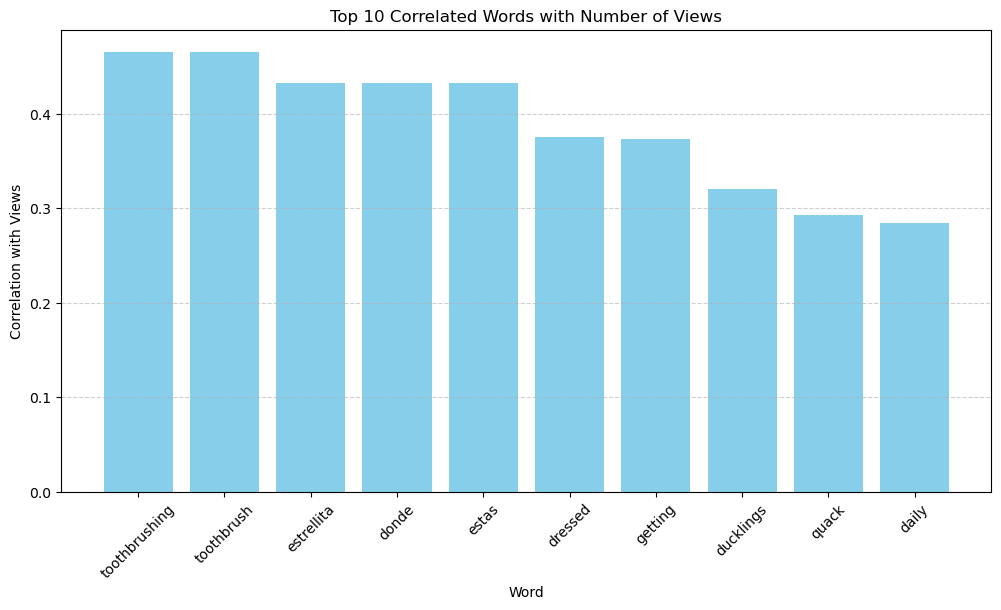

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv('youtube_dataset.csv')

# Extract relevant columns
video_tags = df['tags']
number_of_views = df['viewCount']

# Tokenize and preprocess video tags
vectorizer = CountVectorizer(token_pattern=r'[a-zA-Z0-9_-]+')
tag_matrix = vectorizer.fit_transform(video_tags)

# Calculate word frequency in tags
word_frequencies = tag_matrix.sum(axis=0)

# Convert word frequencies to a DataFrame
word_frequency_df = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Frequency': word_frequencies.tolist()[0]
})

# Calculate Pearson correlation between word frequency and number of views
correlations = []
for word in word_frequency_df['Word']:
    correlation, _ = pearsonr(tag_matrix[:, vectorizer.vocabulary_[word]].toarray().flatten(), number_of_views)
    correlations.append(correlation)

# Create a DataFrame for correlations
correlation_df = pd.DataFrame({
    'Word': word_frequency_df['Word'],
    'Correlation with Views': correlations,
    'Frequency': word_frequency_df['Frequency']
})

# Sort by correlation coefficient (descending order)
correlation_df = correlation_df.sort_values(by='Correlation with Views', ascending=False)

# Plot a bar chart
top_words = 10
plt.figure(figsize=(12, 6))
plt.bar(correlation_df['Word'][:top_words], correlation_df['Correlation with Views'][:top_words], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Correlation with Views')
plt.title(f'Top {top_words} Correlated Words with Number of Views')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


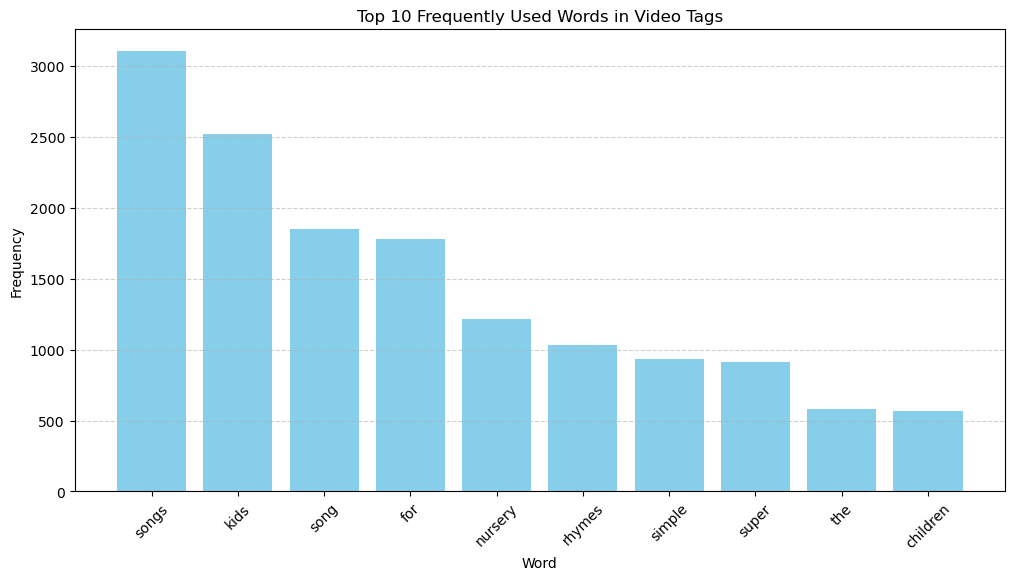

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
df = pd.read_csv('youtube_dataset.csv')

# Extract relevant columns
video_tags = df['tags']
number_of_views = df['viewCount']

# Tokenize and preprocess video tags
vectorizer = CountVectorizer(token_pattern=r'[a-zA-Z0-9_-]+')
tag_matrix = vectorizer.fit_transform(video_tags)

# Calculate word frequency in tags
word_frequencies = tag_matrix.sum(axis=0)

# Convert word frequencies to a DataFrame
word_frequency_df = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Frequency': word_frequencies.tolist()[0]
})

# Sort by frequency in descending order
word_frequency_df = word_frequency_df.sort_values(by='Frequency', ascending=False)

# Filter for top N words (e.g., top 10)
top_n_words = 10
top_words = word_frequency_df.head(top_n_words)

# Plot the top N words and their frequencies
plt.figure(figsize=(12, 6))
plt.bar(top_words['Word'], top_words['Frequency'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title(f'Top {top_n_words} Frequently Used Words in Video Tags')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


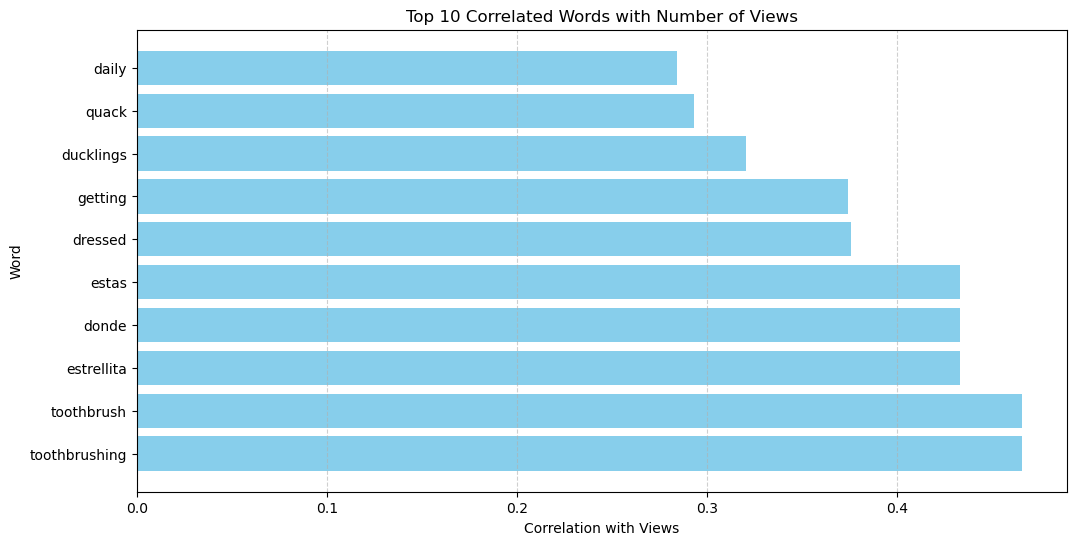

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv('youtube_dataset.csv')

# Extract relevant columns
video_tags = df['tags']
number_of_views = df['viewCount']

# Tokenize and preprocess video tags
vectorizer = CountVectorizer(token_pattern=r'[a-zA-Z0-9_-]+')
tag_matrix = vectorizer.fit_transform(video_tags)

# Calculate word frequency in tags
word_frequencies = tag_matrix.sum(axis=0)

# Convert word frequencies to a DataFrame
word_frequency_df = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Frequency': word_frequencies.tolist()[0]
})

# Calculate Pearson correlation between word frequency and number of views
correlations = []
for word in word_frequency_df['Word']:
    correlation, _ = pearsonr(tag_matrix[:, vectorizer.vocabulary_[word]].toarray().flatten(), number_of_views)
    correlations.append(correlation)

# Create a DataFrame for correlations
correlation_df = pd.DataFrame({
    'Word': word_frequency_df['Word'],
    'Correlation with Views': correlations,
    'Frequency': word_frequency_df['Frequency']
})

# Sort by correlation coefficient (descending order)
correlation_df = correlation_df.sort_values(by='Correlation with Views', ascending=False)

# Filter for top N correlated words (e.g., top 10)
top_n_words = 10
top_correlated_words = correlation_df.head(top_n_words)

# Plot the top N correlated words and their correlation coefficients
plt.figure(figsize=(12, 6))
plt.barh(top_correlated_words['Word'], top_correlated_words['Correlation with Views'], color='skyblue')
plt.xlabel('Correlation with Views')
plt.ylabel('Word')
plt.title(f'Top {top_n_words} Correlated Words with Number of Views')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


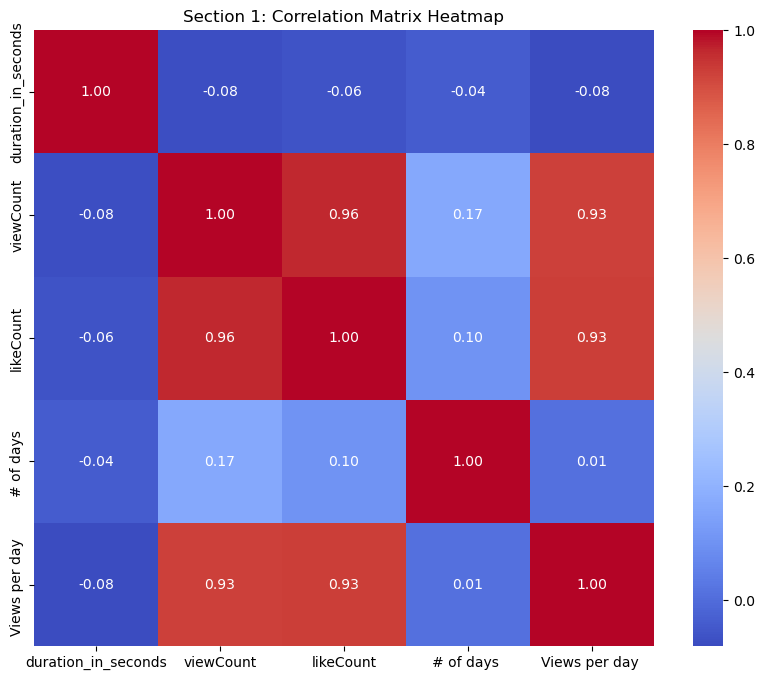

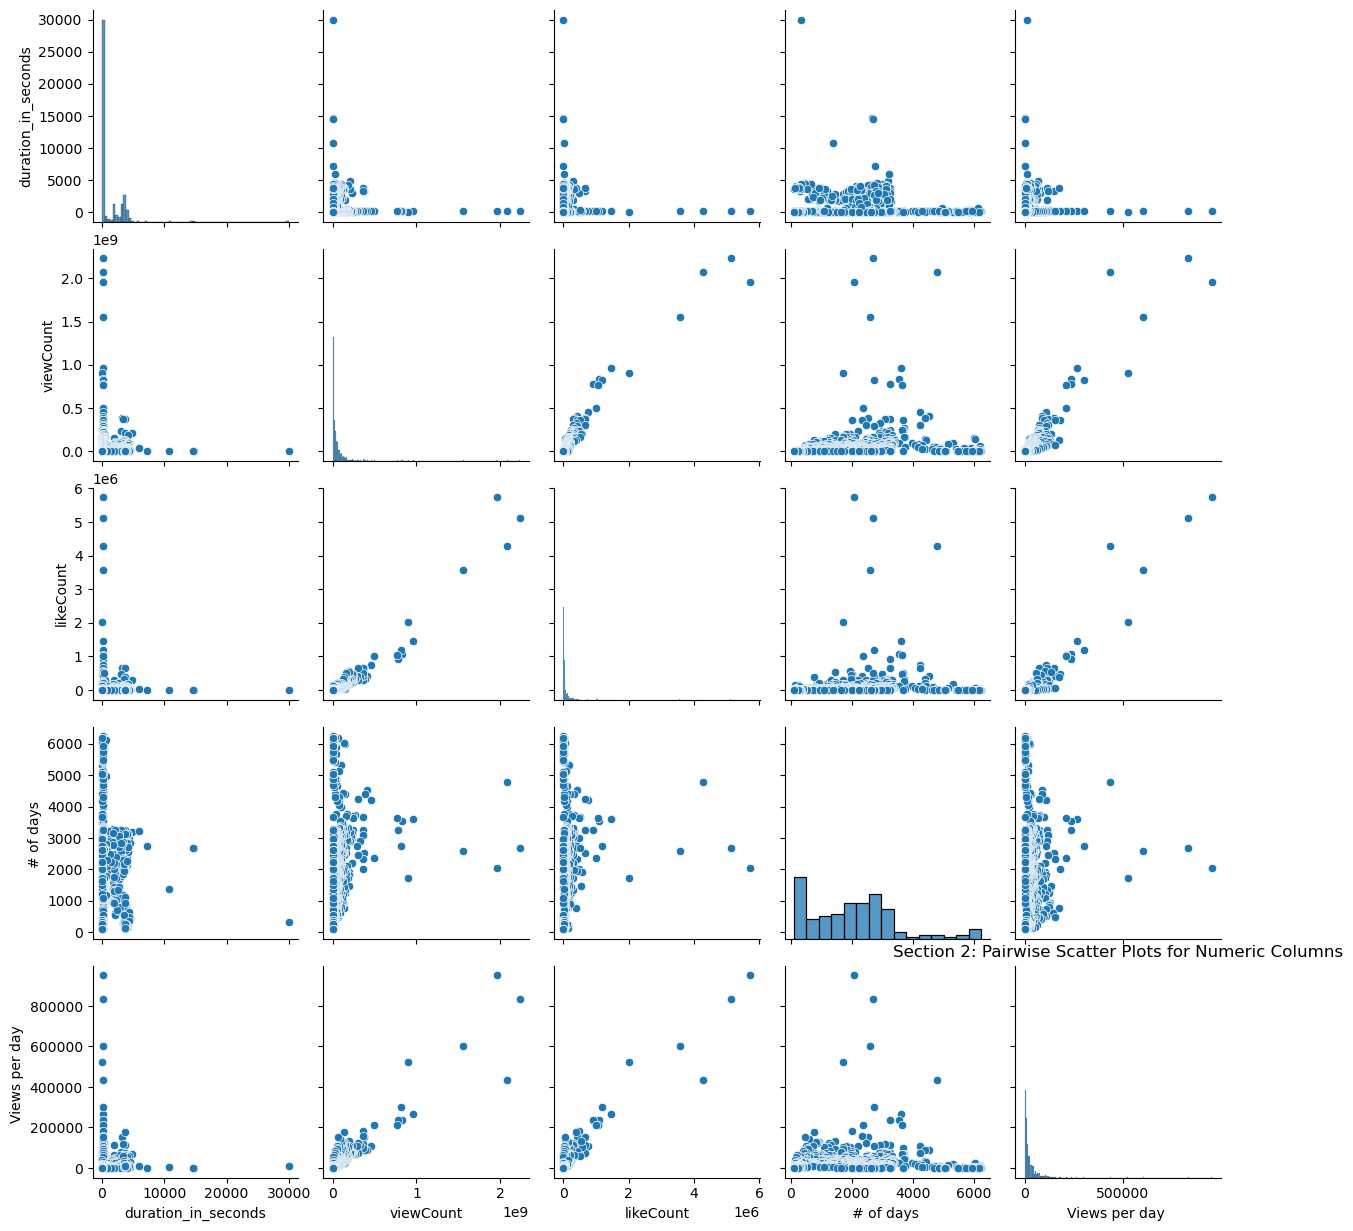

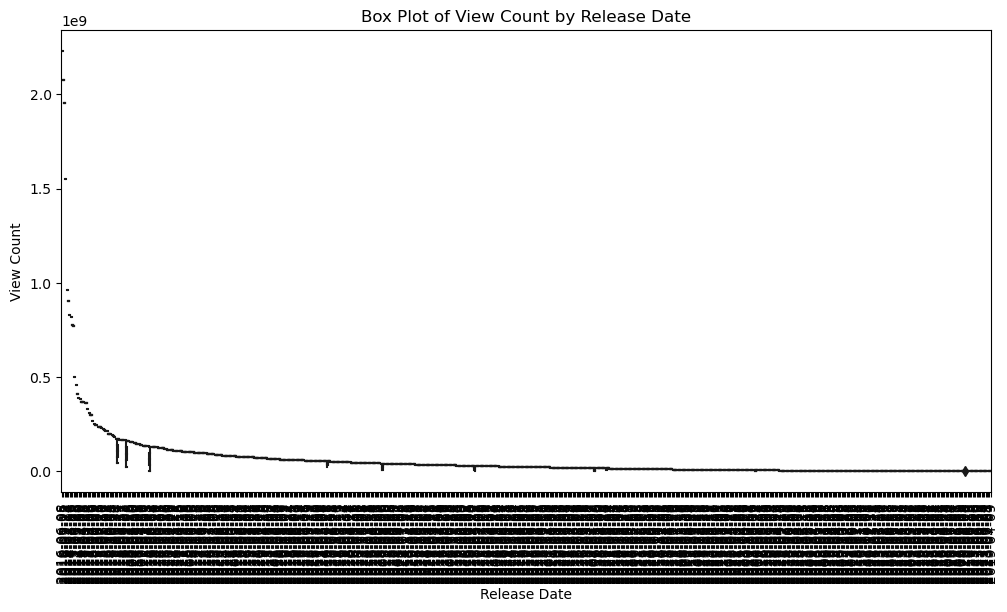

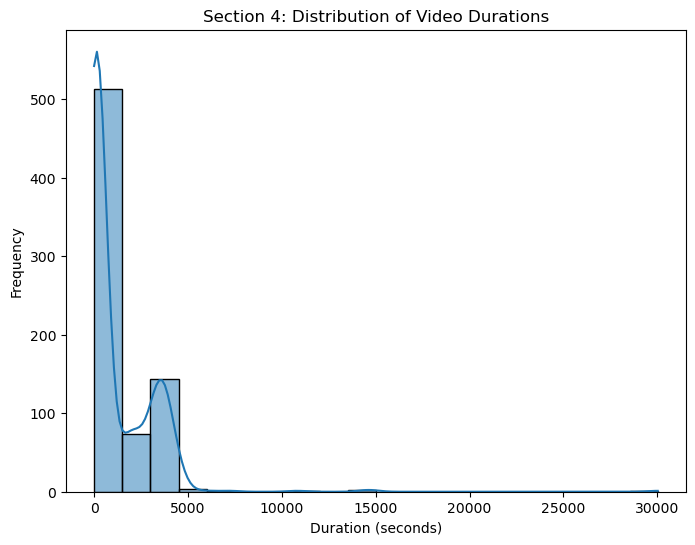


Section 5: Summary Statistics
+-------+---------------------+---------------+------------+------------+----------------+
|       | duration_in_seconds |   viewCount   | likeCount  | # of days  | Views per day  |
+-------+---------------------+---------------+------------+------------+----------------+
| count |       739.00        |    739.00     |   736.00   |   739.00   |     739.00     |
| mean  |       1165.96       |  60446049.85  |  96925.19  |  2016.97   |    29394.86    |
|  std  |       1979.04       | 171625977.08  | 377164.83  |  1422.34   |    65232.19    |
|  min  |        0.00         |     0.00      |   17.00    |   96.00    |      0.00      |
|  25%  |       102.00        |  2762476.50   |  9860.50   |   824.50   |    4812.50     |
|  50%  |       163.00        |  20023761.00  |  27013.50  |  2037.00   |    12510.00    |
|  75%  |       2057.00       |  56839654.00  |  70140.25  |  2794.50   |    31360.00    |
|  max  |      30023.00       | 2230545275.00 | 5733816.00 

In [28]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load the dataset
df = pd.read_csv('youtube_dataset.csv')

# Clean and convert columns to numeric types
df['# of days '] = df['# of days '].str.replace(',', '').astype(float)

# Convert 'Views per day ' to numeric (remove commas and convert)
df['Views per day '] = df['Views per day '].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df['Views per day '] = pd.to_numeric(df['Views per day '], errors='coerce')

# Exclude non-numeric columns for correlation calculation
numeric_columns = ['duration_in_seconds', 'viewCount', 'likeCount', '# of days ', 'Views per day ']
correlation_matrix = df[numeric_columns].corr()

# Section 1: Visualize Correlation Matrix as a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Section 1: Correlation Matrix Heatmap')
plt.show()

# Section 2: Pairwise Scatter Plots for Numeric Columns
sns.pairplot(df[numeric_columns])
plt.title('Section 2: Pairwise Scatter Plots for Numeric Columns')
plt.show()

# Section 3: Box Plot of View Count by Release Date
plt.figure(figsize=(12, 6))
sns.boxplot(x='Date of release ', y='viewCount', data=df, palette='viridis')  # Change 'viridis' to a different palette if needed
plt.xticks(rotation=90)
plt.title('Box Plot of View Count by Release Date')
plt.xlabel('Release Date')
plt.ylabel('View Count')
plt.show()

# Section 4: Distribution of Video Durations
plt.figure(figsize=(8, 6))
sns.histplot(df['duration_in_seconds'], bins=20, kde=True)
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Section 4: Distribution of Video Durations')
plt.show()

# Section 5: Display Summary Statistics
summary_stats = df.describe().applymap(lambda x: f'{x:.2f}' if isinstance(x, (float, int)) else x)
print("\nSection 5: Summary Statistics")
summary_table = tabulate(summary_stats, headers='keys', tablefmt='pretty')
print(summary_table)


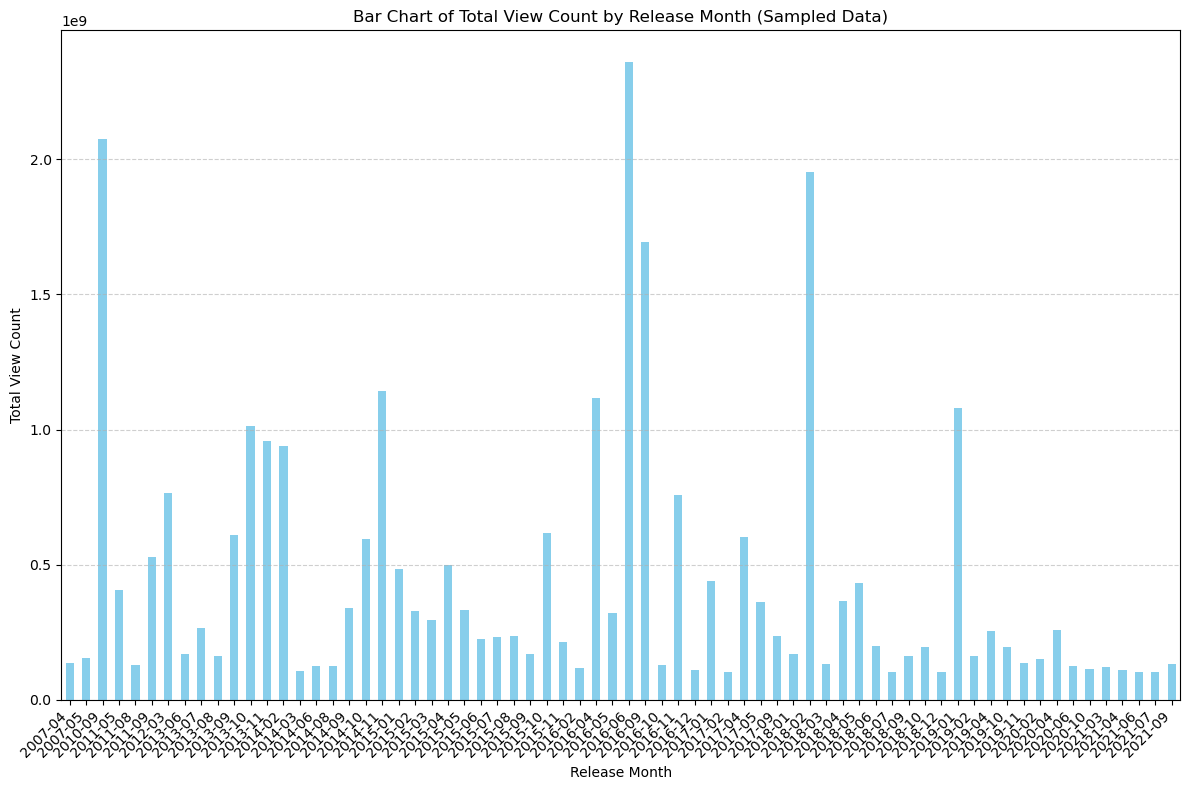

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('youtube_dataset.csv')

# Convert 'Date of release ' column to datetime
df['Date of release '] = pd.to_datetime(df['Date of release '])

# Extract the month and year from the 'Date of release ' column
df['Release Month'] = df['Date of release '].dt.to_period('M')

# Sample a portion of the data (e.g., first 100 rows)
sampled_data = df.head(100)

# Group by Release Month and calculate the sum of view counts
monthly_data = sampled_data.groupby('Release Month')['viewCount'].sum()

# Bar Chart of View Count by Release Month
plt.figure(figsize=(12, 8))
monthly_data.plot(kind='bar', color='skyblue')
plt.xlabel('Release Month')
plt.ylabel('Total View Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title('Bar Chart of Total View Count by Release Month (Sampled Data)')
plt.tight_layout()
plt.show()
